<a href="https://colab.research.google.com/github/HannahParker/cse380-notebooks/blob/master/10_2_Ponder_and_Prove_Spanning_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Spanning Trees
## Due: Saturday, 13 March 2021, 11:59 pm

## The Goal

The goal of this assignment is to investigate spanning trees of graphs.

Here is the example spanning tree you saw in your DPC:

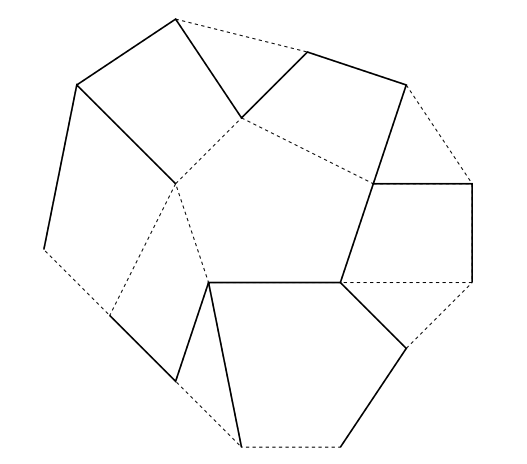

Wikipedia has a [Spanning Tree](https://en.wikipedia.org/wiki/Spanning_tree) page with useful information.

## Algorithm to Find a Spanning Tree

In [4]:
class GraphNode():
  def __init__(self, value = 0, links = []):
    self.value = value
    self.links = links

  def is_link(self, neighbor_value):
    if neighbor_value in links:
      return True
    return False

  def add_link(self, neighbor_value):
    if not neighbor_value in self.links:
      self.links.append(neighbor_value)

  def remove_link(self, neighbor_value):
    link.remove(neighbor_value)

  def __eq__(self, node):
    return self.value == node.value and set(self.links) == set(node.links)

In [22]:
class Graph():
  def __init__(self, nodes = [], links = []):
    self.nodes = []
    for node in nodes:
      adjacent_nodes = [link[1] for link in links if link[0] == node] + [link[0] for link in links if link[1] == node]
      self.nodes.append(GraphNode(node, adjacent_nodes))

  def get_node(self, node_value):
    return next(graphNode for graphNode in self.nodes if graphNode.value == node_value)

  def get_nodes(self):
    return [node.value for node in self.nodes]

  def get_links(self):
    links = [str(adj_list[0]) + str(adjacent_node) for adj_list in self.get_adjacency_list() for adjacent_node in adj_list[1]]
    return list(set(tuple(sorted(link)) for link in links))

  def get_adjacent_nodes(self, node_value):
    node = self.get_node(node_value)
    return (node.value, node.links)

  def get_adjacency_list(self):
    return [(graphNode.value, graphNode.links) for graphNode in self.nodes]

  def is_adjacent(self, node_from, node_to):
    self.add_node(node_from)
    node = self.get_node(node_from)
    return node.is_link(node_to)

  def add_node(self, node_value, links = []):
        if not node_value in self.get_nodes():
            self.nodes.append(GraphNode(node_value, links))

  def add_link(self, node_from, node_to):
    self.add_node(node_from)
    node = self.get_node(node_from)
    if not node.is_link(node_to):
      node.add_link(node_to)
    self.add_node(node_to)
    node = self.get_node(node_to)
    if not node.is_link(node_from):
      node.add_link(node_from)


In [23]:
nodes = [1, 2, 3, 4, 5]
links = [(1,2), (2,4), (3,5), (1,4)]
graph = Graph(nodes, links)
print(graph.get_nodes())
print(graph.get_links())
print(graph.get_adjacent_nodes(1))
print(graph.get_adjacency_list())

[1, 2, 3, 4, 5]
[('1', '2'), ('2', '4'), ('3', '5'), ('1', '4')]
(1, [2, 4])
[(1, [2, 4]), (2, [4, 1]), (3, [5]), (4, [2, 1]), (5, [3])]


In five pseudocode steps:
1. Start with the "frontier" being a list of size one --- containing just the first node.
2. Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.
3. Add that destination node to the frontier unless already there.
4. Add the picked link to the spanning-tree.
5. Repeat steps 2-4 until all nodes are in the frontier.

In [37]:
import random

def find_spanning_tree(graph):
  # Start with the "frontier" being a list of size one --- containing just the first node.
  frontier = [graph.get_nodes()[0]]
  tree = Graph(graph.get_nodes(), [])

  # Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.
  while len(frontier) < len(graph.get_nodes()):
    node = frontier[random.randint(0, len(frontier) - 1)]

    if not set(frontier).issuperset(graph.get_adjacent_nodes(node)[1]):
      available_nodes = list(set(frontier).symmetric_difference(graph.get_adjacent_nodes(node)[1]) - set(frontier))
      dest_node = available_nodes[random.randint(0, len(available_nodes) - 1)]

      # Add that destination node to the frontier unless already there.
      frontier.append(dest_node)

      # Add the picked link to the spanning-tree.
      tree.add_link(node, dest_node)

  return tree


## What to Create

1. A graph representation --- a way to represent both nodes and links.
2. A function that takes a graph and returns a list of its nodes.
3. A function that takes a graph and returns a list of its links.
4. A function that takes a graph and returns an adjacency list of nodes and links.
5. A function that takes a graph and a node and returns a list of adjacent nodes to that node.

## Test Your Code

You will need several different types of graphs (including ladder graphs) with which to test your algorithm.


See the self-assessment for specifics.

In [38]:
import graphviz

def display_graph(graph, engine = 'fdp'):
  graphic = graphviz.Graph(format='png')
  # graphic.edges([str(adj_list[0]) + str(adjacent_node) for adj_list in graph.get_adjacency_list() for adjacent_node in adj_list[1]])
  graphic.edges([str(link[0]) + str(link[1]) for link in graph.get_links()])
  graphic.engine = engine
  return graphic


In [39]:
def generate_ladder_graph(n):
  nodes = [chr(i+97) for i in range(n * 2)]
  links = []
  for i in range(n):
    if (i != 0):
      # The vertical bar links
      links.append((chr((i*2) - 1 + 96), chr((i*2) + 1 + 96)))
      links.append((chr((i*2) + 96), chr((i*2) + 2 + 96)))
    # The horizontal bar link
    links.append((chr((i*2) + 1 + 96), chr((i*2) + 2 + 96)))
    
  return Graph(nodes, links)


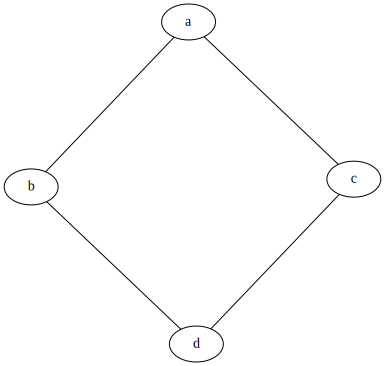

In [40]:
# Ladder Graph with 2 rungs
ladder2 = generate_ladder_graph(2)
display_graph(ladder2, 'sfdp')

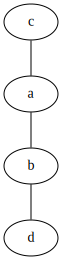

In [41]:
tree = find_spanning_tree(ladder2)
display_graph(tree, 'twopi')

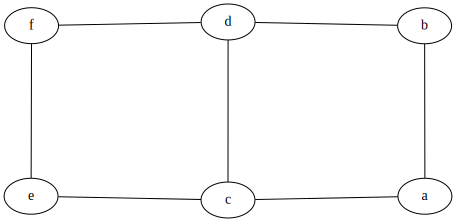

In [13]:
# Ladder Graph with 3 rungs
ladder3 = generate_ladder_graph(3)
display_graph(ladder3, 'sfdp')

['a']


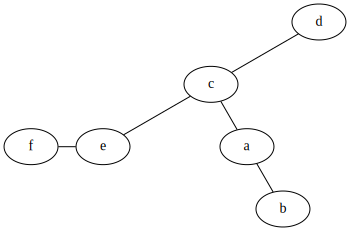

In [14]:
tree = find_spanning_tree(ladder3)
display_graph(tree, 'twopi')

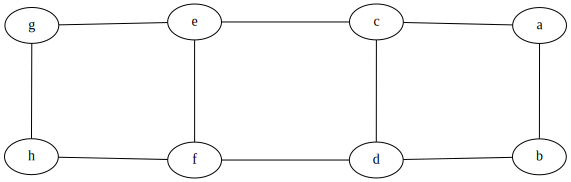

In [15]:
# Ladder Graph with 4 rungs
ladder4 = generate_ladder_graph(4)
display_graph(ladder4, 'sfdp')

['a']


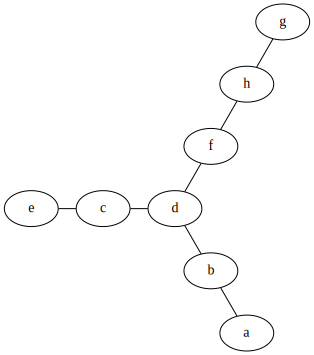

In [16]:
tree = find_spanning_tree(ladder4)
display_graph(tree, 'twopi')

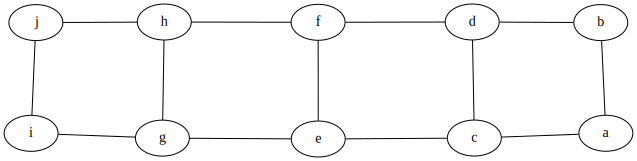

In [17]:
# Ladder Graph with 5 rungs
ladder5 = generate_ladder_graph(5)
display_graph(ladder5, 'sfdp')

['a']


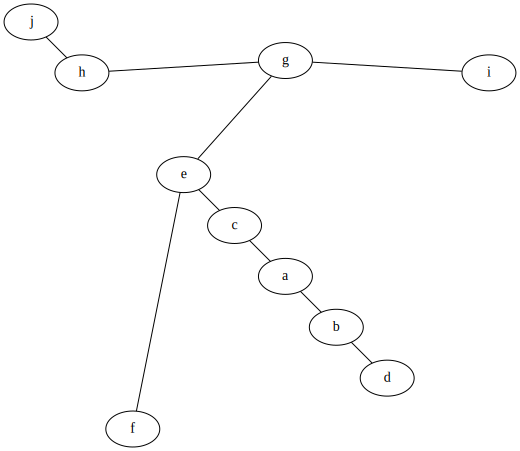

In [18]:
tree = find_spanning_tree(ladder5)
display_graph(tree, 'twopi')

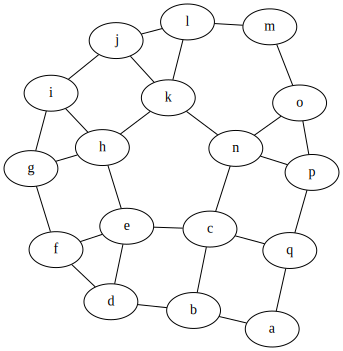

In [19]:
nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q']
links = [
  ('a', 'b'), ('a', 'q'), ('b', 'c'), ('b', 'd'), ('c', 'n'), ('c', 'q'), ('d', 'e'), ('d', 'f'), ('e', 'c'),
  ('e', 'h'), ('e', 'f'), ('f', 'g'), ('g', 'h'), ('g', 'i'), ('h', 'k'), ('h', 'i'), ('i', 'j'), ('j', 'k'),
  ('j', 'l'), ('k', 'l'), ('k', 'n'), ('l', 'm'), ('m', 'o'), ('n', 'o'), ('n', 'p'), ('p', 'o'), ('p', 'q')
]

neff_graph = Graph(nodes, links)
display_graph(neff_graph, 'neato')


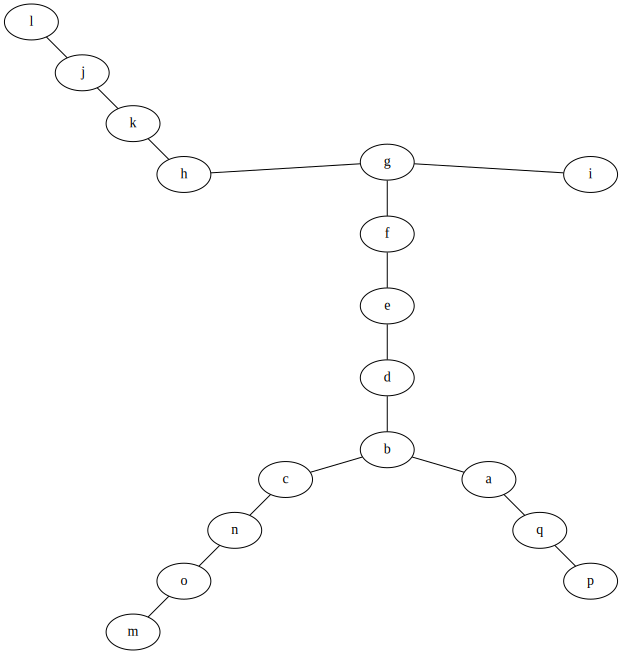

In [42]:
tree = find_spanning_tree(neff_graph)
display_graph(tree, 'twopi')

In [43]:
def generate_random_graph(n):
  nodes = [chr(i+97) for i in range(n)]
  links = []
  for node in nodes:
    for i in range(0, random.randint(2, 3)):
      j = random.randint(0, len(nodes)-1)
      if node != nodes[j]:
        links.append((node, nodes[j]))
  print(len(links))
  return Graph(nodes, links)


In [48]:
big_1 = generate_random_graph(22)
big_2 = generate_random_graph(24)
big_3 = generate_random_graph(26)
big_span_1 = find_spanning_tree(big_1)
big_span_2 = find_spanning_tree(big_2)
big_span_3 = find_spanning_tree(big_3)

48
61
64


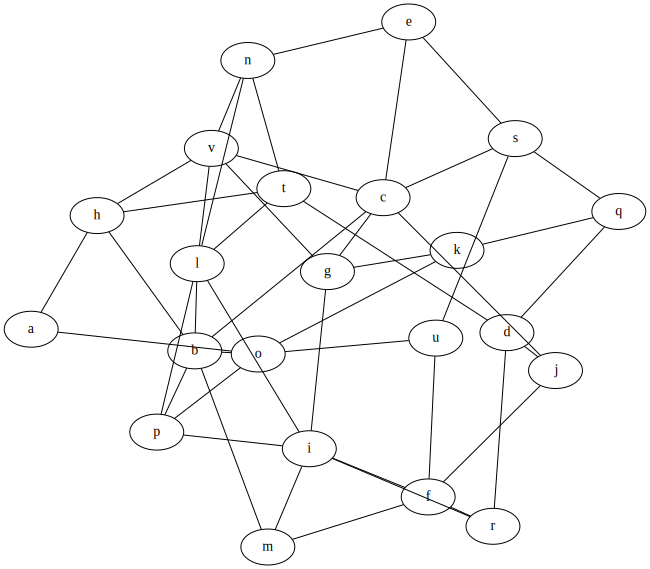

In [49]:
display_graph(big_1, 'sfdp')

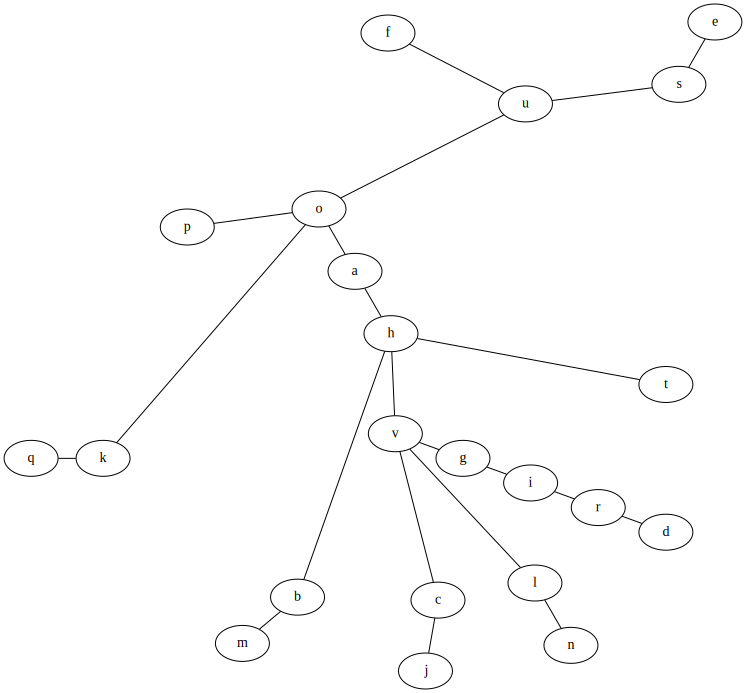

In [50]:
display_graph(big_span_1, 'twopi')

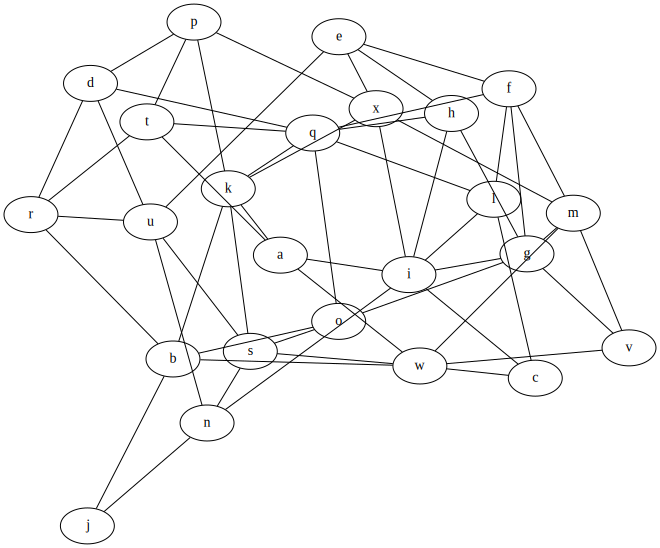

In [51]:
display_graph(big_2, 'sfdp')

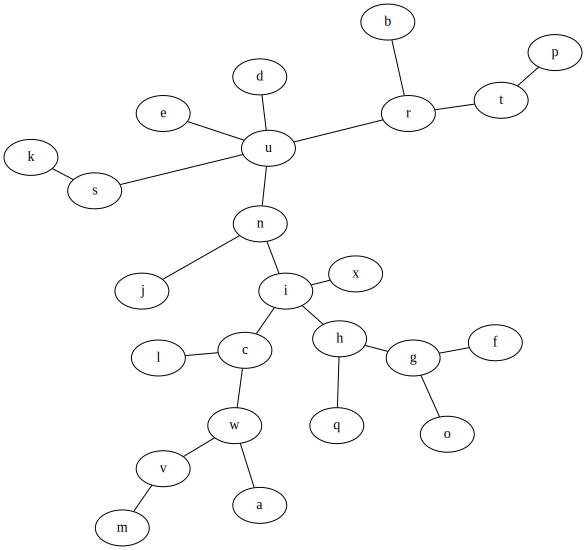

In [52]:
display_graph(big_span_2, 'twopi')

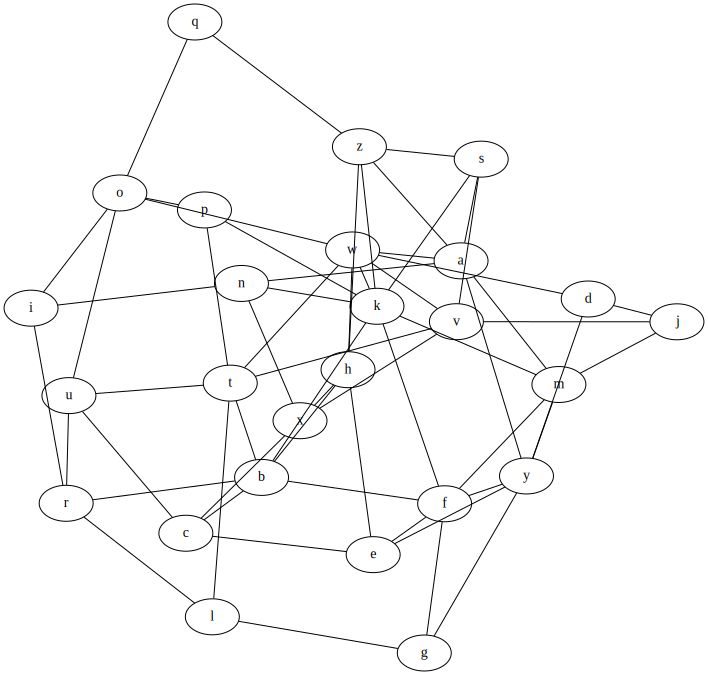

In [53]:
display_graph(big_3, 'sfdp')

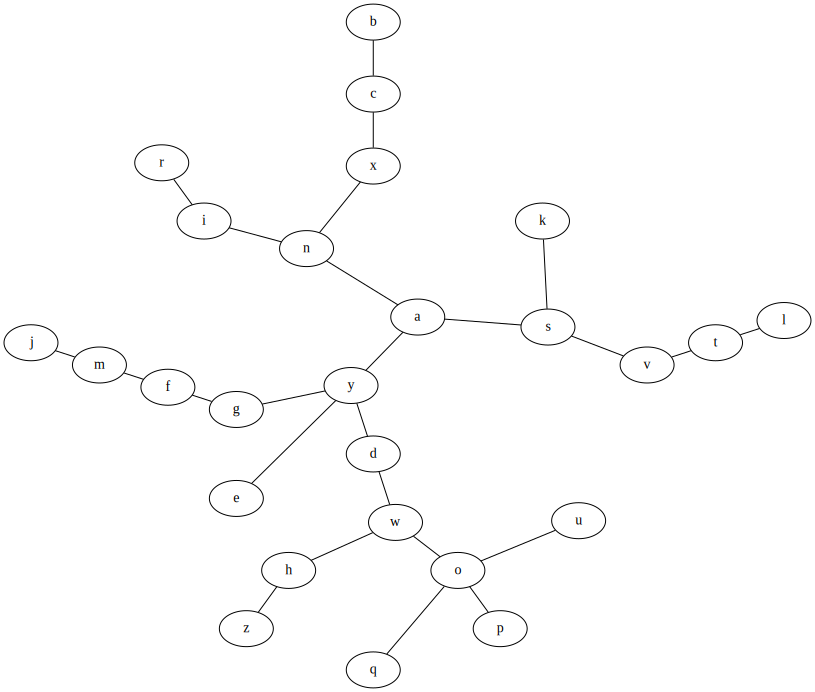

In [54]:
display_graph(big_span_3, 'twopi')

# TODO My Report on What I Did and What I Learned

## Fun


This Prove was a stuggle for me. It took a long time to complete. In the beginning I would say it was not fun. However, as a figured out how to solve the problems and was able to see the visualizations of the graphs, it became fun. 

## New

I learned a lot of new programming tricks in python. I had never programmed with sets before and learned how to do this. I also learned how to use graphviz!

## Meaningful


I think that the most meaningful thing that I was able to gain from this was that I further developed my programming skills. I think this will be helpful going forward. I also learned a lot more about graph theory which may be helpful in the remainder of my DM classes.

## Other

Connections: I can make a connection between what I learned in DM1. In DM1, I learned about nodes, links, and edges. Just the definitions. I never had to apply this (atleast not in code). I feel like now I can connect the definitions to the graphs themselves and the code. 

Collaborator Contributions:
- Claire Hocker
- Bretton Steiner
- Daniel Strickland

We met on a zoom meeting and completed the assignment together.

# TODO What is True?
Click on each warranted checkbox to toggle it to True (or back to False). 

NOTE: *This only works in Colab. If you run it in some other Jupyter notebook client/server environment you may have to change False to True (or vice versa) manually.*

This self-assessment is subject to revision by a grader.

In [55]:
#@markdown ## What is True about what I did?
#@markdown ### I had fun.
cb00 = True #@param {type:'boolean'}
#@markdown ### I learned something new.
cb01 = True #@param {type:'boolean'}
#@markdown ### I achieved something meaningful, or something I can build upon at a later time.
cb02 = True #@param {type:'boolean'}
#@markdown ## What is True about my report?
#@markdown ### I wrote a sufficient number of well-written sentences.
cb03 = True #@param {type:'boolean'}
#@markdown ### My report is free of mechanical infelicities.
cb04 = True #@param {type:'boolean'}
#@markdown ### I used Grammarly (or something better described in my report) to check for MIs.
cb05 = True #@param {type:'boolean'}
#@markdown ### I reported on any connections I found between these problems and something I already know. 
cb06 = True #@param {type:'boolean'}
#@markdown ### I reported who were and what contribution each of my collaborators made.
cb07 = True #@param {type:'boolean'}
#@markdown ## What is True about my code?
#@markdown ### I created code to represent a graph as (at a bare minimum) a set of nodes and a set of links.
cb08 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its nodes.
cb09 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its links.
cb10 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns an adjacency list of nodes and links.
cb11 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and a node and returns a list of adjacent nodes to that node.
cb12 = True #@param {type:'boolean'}
#@markdown ### I correctly implemented the spanning tree algorithm.
cb13 = True #@param {type:'boolean'}
#@markdown ## What is true about my testing?
#@markdown ### I created a ladder graph with 2 rungs and tested my code on it.
cb14 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 3 rungs and tested my code on it.
cb15 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 4 rungs and tested my code on it.
cb16 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 5 rungs and tested my code on it.
cb17 = True #@param {type:'boolean'}
#@markdown ### I created a graph from the example at the top of this notebook and tested my code on it.
cb18 = True #@param {type:'boolean'}
#@markdown ### I created three larger graphs (each with more than 20 nodes and more than 40 links) of my own devising and tested my code on it.
cb19 = True #@param {type:'boolean'}

## DO NOT CHANGE ANYTHING IN THE NEXT CODE CELL!!
### Delete this cell and the following ones before submitting your work.

In [56]:
points_for_what_I_did = [5]*3
points_for_my_report = [8]*5
points_for_my_code = [5]*6
points_for_my_testing = [2]*4 + [3,4]
points = points_for_what_I_did + points_for_my_report + points_for_my_code + points_for_my_testing
# cb is short for checkbox
total = sum(map(lambda n, p: p if eval(f'cb{n:02}') else 0,
                range(len(points)), points))             
total

100

# For graders

In [ ]:
#@markdown ---
number_of_MIs_found = 0 #@param {type: 'slider', min: 0, max: 5}
#@markdown ---
